# TKO2096 
## EXERCISE I
YUE MA 520790

> Use Python 3 to program your OWN implementation of k-nearest neighbors (kNN) and a way to compute cross-validation for it. The implementation should be easily modifiable, since the forthcoming exercises involve different problem-dependent variations of cross-validation.
Select a data set from the UCI machine learning repository: http://archive.ics.uci.edu/ml/
Use cross-validation on the training set and report the performance (e.g. classification or regression error) for different values of k
Program a nested CV for bonus points.
Write a report including commented code and description of the implementation ideas, description of the data set and the learning problem and your observations about the results. Return your solution for each exercise BOTH as a Jupyter Notebook .ipynb notebook and as a PDF-file made from it.
Return the report to the course page on Monday 21. of January at the latest.

In [7]:
import numpy as np
import pandas as pd
import pdb
import operator

In [8]:
iris_data=pd.read_csv("/Users/mayue/Desktop/TKO-2096/Exe/iris.csv")

This dataset is the classical iris dataset which is usually used for learning ML.There are three attributes which describe the sepal and petal's size. The target attribute is often the "class" which includes three possible categories.

In [9]:
display(iris_data)

,sepal length,sepal width,petal length,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
iris_data.iloc[:,0:4]

,sepal length,sepal width,petal length,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


A function has been defined to predict AN INSTANCE's class according to the training set. This part refered to the book:
*Harrington, P. (2012). Machine learning in action. Shelter Island, NY: Manning Publications Co.*
The distance metric is euclidean distance.


In [70]:
"""define the function for K-NN """
"""Harrington, P. (2012). Machine learning in action. Shelter Island, NY: Manning Publications Co."""
def KNN_predict(dataSet,targets,inX,num_neighbors=3):
    """dataSet is the data used for training"""
    """targets is the labels of the training data"""
    """inX is the INSTANCE to be predicted"""
    """output: predicted label for the instance"""
    #calculate the distance
    size=dataSet.shape[0]
    diffMat=np.tile(inX, (size,1))-dataSet
#     pdb.set_trace()
    sqDiffMat=diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)
    distances=sqDistances**0.5
    sortedDistanceIndices=distances.argsort()
    classCount={}
    for i in range(num_neighbors):
        voteIlabel=targets[sortedDistanceIndices[i]]
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
    sortedClassCount=sorted(classCount.iteritems(),
                           key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [71]:

from scipy.stats import zscore
"""Data preprocessing,normalization"""
iris_attributes=np.array(iris_data.iloc[:,0:4])
iris_attributes=zscore(iris_attributes)#normalization
iris_targets=np.array(iris_data['class'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_attributes,iris_targets,test_size=0.33, random_state=42)

Above is the part used to preprocess data. For convenience I just used the scipy and sklearn's function.

In [72]:
def k_fold_cross_validate(attributes,targets,predictor,num_fold=3):
    """launch a k-fold CV on given training set and use the given predictor"""
    """attributes:training set attributes"""
    """targets:labels of training set"""
    """predictors: function to be validated"""
    """output:a DataFrame which show the score results"""
    m=attributes.shape[0]
    size_fold=m/num_fold
    score={}
    used_validation_instances=[]#store the used validation instances' indice to avoid repeatly using
    
    for k in range(1,num_fold+1):
#         pdb.set_trace()
        validate_indices=np.random.choice(list(set(range(0,m))-set(used_validation_instances)),size_fold,replace=False)#randomly select the instances from REMAIN instances       
        train_indices=np.array(list(set(range(0,m))-set(validate_indices)))       
        used_validation_instances+=validate_indices.tolist()#add used validation instances into the list
        
        count_correct=[]
        for indice in validate_indices:
            pred=KNN_predict(attributes[train_indices],targets[train_indices],attributes[indice],num_neighbors=3)
            if pred==targets[indice]:
                count_correct.append(1)
            else:
                count_correct.append(0)
#         pdb.set_trace()
        score[str(k)]=(sum(count_correct)/float(size_fold))
    
    result=pd.DataFrame.from_dict(score,orient='index',columns=['score'])
    result.index=result.index.astype("int")
    result=result.sort_index()#re-arrange the order of results
    return(result)

In [65]:
CV_result_1=k_fold_cross_validate(iris_attributes,iris_targets,KNN_predict,10)
display(CV_result_1)

,score
1,0.933333
2,1.000000
3,0.866667
4,0.933333
5,0.933333
6,0.866667
7,0.933333
8,1.000000
9,1.000000
10,1.000000


Text(0,0.5,'Accuracy')

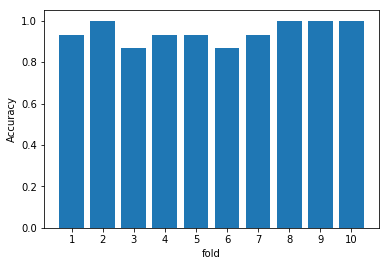

In [205]:
import matplotlib.pyplot as plt
plt.bar([str(i) for i in CV_result_1.index.tolist()],CV_result_1.iloc[:,0])
plt.xlabel("fold")
plt.ylabel("Accuracy")

Code above has constructed a function for k-fold cross validation. It accepts the training set and function used to predict and parameter k(default equals to 3).
- the score part has not been packaged and now it is for classfication accuracy. If necessary I should create the function of scoring to make the CV easier to be modified.
- the predictor is not an object but a function, so parameter should be set in CV (or just follow the default option), for this case, k for KNN is 3.
- From the visualized results we can see that the accuracy is relatively high and the model perform well.

In [206]:
"""Using sklearn to compare the results of CV"""
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(iris_attributes,iris_targets,test_size=0.33, random_state=42)
knn=KNeighborsClassifier(n_neighbors=3)
CV_results_sklearn=cross_val_score(knn, X_train, y_train,cv=10)

Text(0,0.5,'Accuracy')

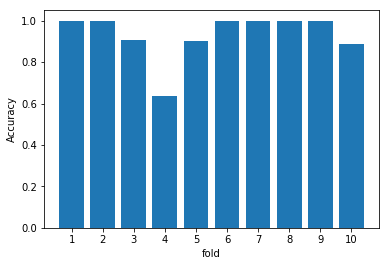

In [207]:
plt.bar([str(i) for i in range(1,11)],CV_results_sklearn)
plt.xlabel("fold")
plt.ylabel("Accuracy")

Next I have used sklearn to launch a 10-fold CV, and the accuracy is also relatively high. Considering the Randomness of selecting data, these two CV results can be regarded as SIMILIAR results.

## Bonus
To complete the bonus work, I have found that I have to refactor the previous code by object-based way. But I decide to not re-write parts above in case there is any error.

In [132]:
class KNN_Classfier():
    """set the hyper parameter K"""
    def __init__(self,num_neighbors=3):
        self.num_neighbors=num_neighbors
        
    def fit(self,attributes,targets):
        """let the classfier 'memorize' the trainset"""
        """attributes and targets are arrays"""
        self.attributes=attributes
        self.targets=targets
        
    def predict(self,inX):
        """predict an input instance's label """
        """inX is an 1-d array which represents an instance"""
        size=self.attributes.shape[0]
        diffMat=np.tile(inX, (size,1))-self.attributes
#     pdb.set_trace()
        sqDiffMat=diffMat**2
        sqDistances=sqDiffMat.sum(axis=1)
        distances=sqDistances**0.5
        sortedDistanceIndices=distances.argsort()
        classCount={}
        for i in range(self.num_neighbors):
            voteIlabel=self.targets[sortedDistanceIndices[i]]
            classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
        sortedClassCount=sorted(classCount.iteritems(),
                               key=operator.itemgetter(1),reverse=True)
        return sortedClassCount[0][0]
        

In [188]:
def accuracy_scorer(predictor,X,y):
    """predictor object should have been fitted to the train data"""
    """X,y (np.array) are dataset used to test the predictor"""
    count_correct=[]
#     pdb.set_trace()
    for inX,iny in zip(X,y):
        #predict for each instance
        pred=predictor.predict(inX)
        if pred==iny:
            count_correct.append(1)
        else:
            count_correct.append(0)
    score=float(sum(count_correct)/float(X.shape[0]))
    return score
    

In [225]:
class Nested_CV():
    def __init__(self,num_fold=10):
        self.num_fold=num_fold
        
    def load_data(self,attributes,targets):
        """load the train data before validating"""
        self.attributes=attributes
        self.targets=targets
        
    def cv_eval(self,predictor_class,scorer,hyper_parameter_values):
        """predictor should be a CLASS"""
        """scorer is the function used to evaluate the predictor"""
        """hyper_parameter:a dict, {'parameter_name':[value1,value2]}"""
        """calculate the validation results and the best value which produce the best performance"""
        m=self.attributes.shape[0]
        size_fold=m/self.num_fold
        hp_scores={}

        hp=hyper_parameter_values.keys()[0]#get the name of the parameter
        for hv in hyper_parameter_values.values()[0]:
            
            predictor=predictor_class(hv)
            scores=[]
            used_validation_instances=[]
#             pdb.set_trace()
            for k in range(1,self.num_fold+1):
                validate_indices=np.random.choice(list(set(range(0,m))-set(used_validation_instances)),size_fold,replace=False)#randomly select the instances from REMAIN instances       
                train_indices=np.array(list(set(range(0,m))-set(validate_indices)))       
                used_validation_instances+=validate_indices.tolist()#add used validation instances into the list
                X_train=self.attributes[train_indices]
                y_train=self.targets[train_indices]
                predictor.fit(X_train,y_train)
                scores.append(scorer(predictor,
                                     self.attributes[validate_indices],
                                     self.targets[validate_indices]))
            hp_scores[str(hv)]=np.mean(scores)
        result=pd.DataFrame.from_dict(hp_scores,orient='index',columns=['score'])
        self.result=result
        self.best_value=result.idxmax().iloc[0]


In [231]:
cccv=Nested_CV(10)
cccv.load_data(X_train,y_train)
cccv.cv_eval(KNN_Classfier,accuracy_scorer,{'num_neighbors':[1,2,3,4,5,6,7,8]})
CV_result_3=cccv.result
print("the best value of K is {}".format(cccv.best_value))

the best value of K is 5


Text(0,0.5,'score')

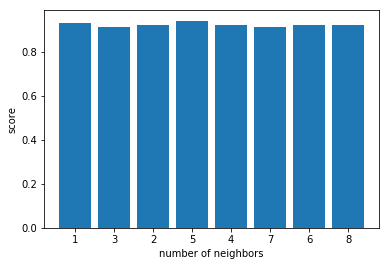

In [232]:
plt.bar([str(i) for i in CV_result_3.index.tolist()],CV_result_3.iloc[:,0])
plt.xlabel("number of neighbors")
plt.ylabel("score")

In this part I have refered the sklearn's way of building a predictor class. The predictor should firstly have its parameters set, then be fitted to the given data set. 

Nested cross validation part is also encapsulated as a class, and it can be combined with predictor class and scorer. This way is also similar to sklearn's. I think this library has provided a good way to encapsulate the cross validation. Even though I am coding my own CV class I can't ignore its solution.

The outer loop of CV tries different parameter values, and inner loop calculate k-fold CV score for each parameter values. Each parameter value's score is given by calculating each inner loop's mean score. Then the parameter value which produce the highest score is the one we want.